In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pmdarima as pm
from pmdarima import datasets, model_selection
from pmdarima.utils import visualization
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import metrics

## Load data
Australian total wine sales by wine makers in bottles <= 1 litre.

In [2]:
data = datasets.load_wineind(as_series=True)  # load dataset
data.index = pd.to_datetime(data.index)       # convert index to datetime
data.index.freq = 'MS'                        # set frequency to month start

# split into train and test sets
train, test = model_selection.train_test_split(data, train_size=150)

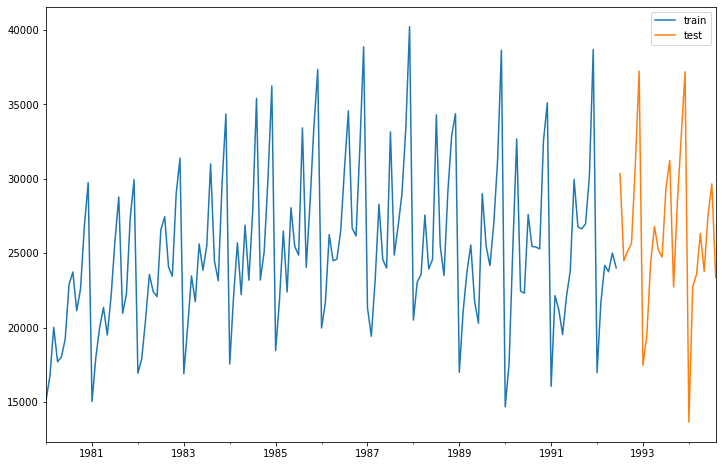

In [3]:
train.rename('train').plot(legend=True, figsize=(12, 8))
test.rename('test').plot(legend=True)
plt.show()

c:\Users\James\miniconda3\envs\tsf\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


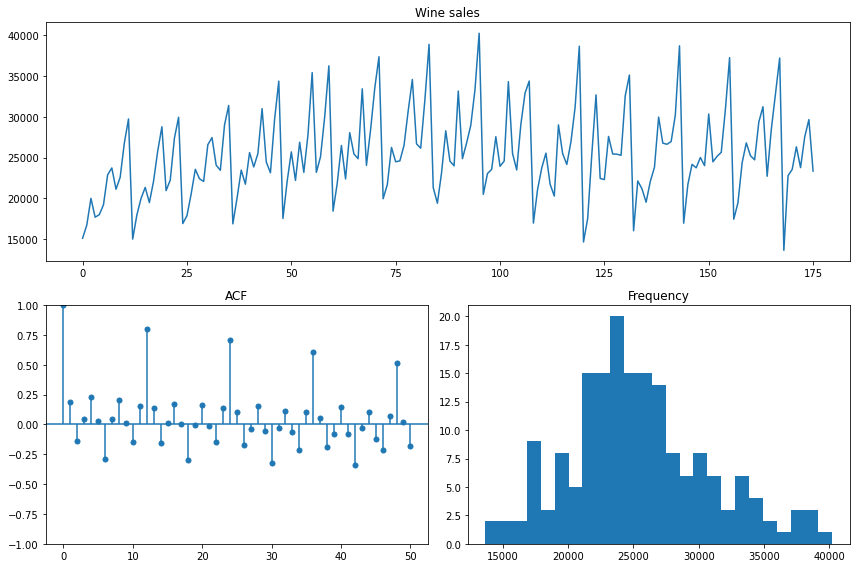

In [4]:
# display some basic information about the time series
visualization.tsdisplay(data, figsize=(12,8), title='Wine sales', show=True)

In [5]:
help(pm.auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [6]:
# fit an auto_arima model
# this will perform tests for stationarity and seasonality for us
stepwise_result = pm.auto_arima(
    train,
    m=12,
    seasonal=True,
    stationary=False,  # if true, then d is set to zero
    test='kpss',  # for stationarity to determine d
    seasonal_test='ocsb',  # for seasonality to determine D
    maxiter=50,
    suppress_warnings=True,
    error_action='ignore',
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2910.953, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3049.597, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2895.934, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2917.891, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3047.612, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3039.240, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2890.929, Time=0.33 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2892.498, Time=0.72 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2890.523, Time=0.26 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2981.524, Time=0.05 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2892.534, Time=0.51 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2931.096, Time=0.32 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2906.713, Time=0.16 sec
 ARIMA(2,1,0)(1,0,1)[12]

In [7]:

stepwise_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  150
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -1418.496
Date:                             Tue, 14 Jun 2022   AIC                           2848.992
Time:                                     11:22:28   BIC                           2867.016
Sample:                                          0   HQIC                          2856.315
                                             - 150                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0339      0.079     -0.430      0.667      -0.188       0.121
ar.L2         -0.2113      0.094     -2.248      0.025      -0.396      -0.027
ma.L1         -0.8622      0.017    -50.288      0.000      -0.896      -0.829
ar.S.L12       0.5045      0.043     11.845      0.000       0.421       0.588
ar.S.L24       0.3313      0.060      5.504      0.000       0.213       0.449
sigma2      9.567e+06   2.26e-09   4.23e+15      0.000    9.57e+06    9.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               461.50
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.29
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.5e+30. Standard errors may be unstable.
"""

In [8]:
# forecast the test set, save the result as a series with the same datetimeindex
y_pred = pd.Series(
    data=stepwise_result.predict(n_periods=len(test)),
    index=test.index
)

# combine test set and forecast into one dataframe for easier plotting
test_df = pd.concat([test, y_pred], axis=1)
test_df.columns = ['y_true', 'y_pred']
test_df.head()

,y_true,y_pred
1992-07-01,30345.0,28544.539535
1992-08-01,24488.0,26622.220152
1992-09-01,25156.0,26597.562361
1992-10-01,25650.0,26637.941995
1992-11-01,30923.0,30672.877527


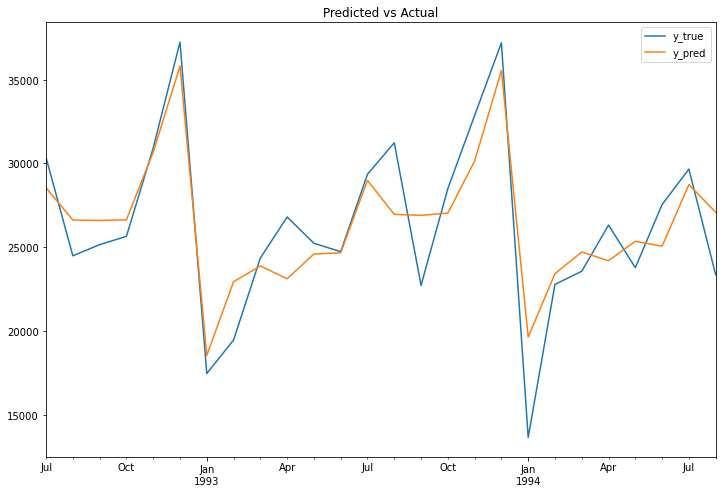

In [9]:
test_df.plot(legend=True, figsize=(12, 8), title='Predicted vs Actual')
plt.show()

In [10]:
mse = metrics.mean_squared_error(test_df.y_true, test_df.y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(test_df.y_true, test_df.y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 5925285.70
RMSE: 2434.19
MAE: 1951.26


In [11]:
# retrain model on all data
model = SARIMAX(
    data,
    order=stepwise_result.order,
    seasonal_order=stepwise_result.seasonal_order,
    enforce_invertibility=False
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  176
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -1659.730
Date:                             Tue, 14 Jun 2022   AIC                           3331.460
Time:                                     11:22:29   BIC                           3350.449
Sample:                                 01-01-1980   HQIC                          3339.163
                                      - 08-01-1994                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0938      0.073     -1.278      0.201      -0.238       0.050
ar.L2         -0.2188      0.085     -2.560      0.010      -0.386      -0.051
ma.L1         -1.1526      0.014    -80.774      0.000      -1.181      -1.125
ar.S.L12       0.4741      0.038     12.421      0.000       0.399       0.549
ar.S.L24       0.3847      0.051      7.566      0.000       0.285       0.484
sigma2       6.73e+06   2.35e-09   2.87e+15      0.000    6.73e+06    6.73e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):               579.78
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             1.31
Prob(H) (two-sided):                  0.02   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+30. Standard errors may be unstable.
"""

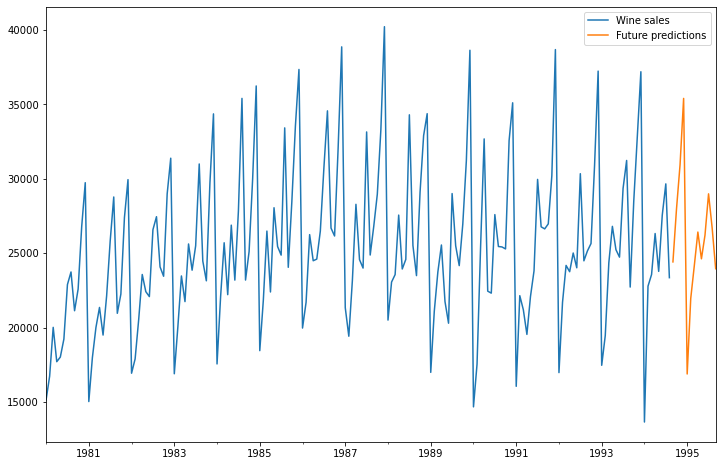

In [12]:
# prediction 12 time steps into the future
fcast = model.predict(
    start=len(data),
    end=len(data) + 12,
    dynamic=False
)

data.rename('Wine sales').plot(legend=True, figsize=(12, 8))
fcast.rename('Future predictions').plot(legend=True)
plt.show()